<a href="https://colab.research.google.com/github/Ammulya/Twitter-Sentiment-Analysis/blob/master/Twitter_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [0]:
import os
os.chdir('/drive/My Drive/PROJECTS')

In [0]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
  

In [4]:
#Loading the data :
data = pd.read_csv('./datasets/train.csv',encoding="latin-1").loc[0:9999]
data.head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
ItemID           10000 non-null int64
Sentiment        10000 non-null int64
SentimentText    10000 non-null object
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [6]:
# check the number of positive vs. negative tagged sentences
positives = data['Sentiment'][data.Sentiment	 == 0]
negatives = data['Sentiment'][data.Sentiment	 == 1]
print('number of positve tagged sentences is:  {}'.format(len(positives)))
print('number of negative tagged sentences is: {}'.format(len(negatives)))
print('total length of the data is:            {}'.format(data.shape[0]))

number of positve tagged sentences is:  5812
number of negative tagged sentences is: 4188
total length of the data is:            10000


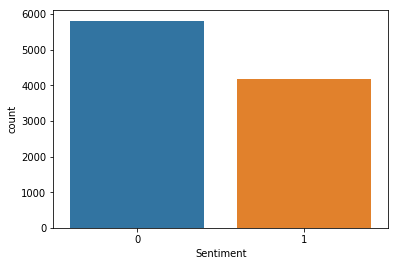

In [7]:
#data visualization
ax = sns.countplot(x="Sentiment",data=data)

# Text preprocessing:

### 1.Removing special charaters,un neccassary things except alphabets:

In [8]:
import nltk
nltk.download('words')
#Function to preprocessing theSentiment Text column
def textprocess(text):
    text = text.lower()#convert to lower case
    text = re.sub(r'[^a-z]+',' ',text)#subsitute all values with spaces except alphabets
    text = re.sub(r'\b\w{1,2}\b', '', text)#It will subsitute all the short words with space
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)#it will remove repeated characters of a word
    text = pattern.sub(r"\1\1", text)
     
    return text

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [9]:
#Applying the Text process function on the data
data['SentimentText']=data['SentimentText'].apply(textprocess)
len(data['SentimentText'])
data.head(10)

,ItemID,Sentiment,SentimentText
0,1,0,sad for apl friend
1,2,0,missed the new moon trailer
2,3,1,omg its already
3,4,0,omgaga soo gunna cry been this dentist si...
4,5,0,think cheating
5,6,0,just worry too much
6,7,1,juusst chillin
7,8,0,sunny again work tomorrow tonight
8,9,1,handed uniform today miss you already
9,10,1,hmm wonder how she number


In [0]:
# Removing all the Non-English words
words = set(nltk.corpus.words.words())
def strip_non_en(string, words=words, key=None):
    if key in (None, 'title'):
        string = ' '.join(w for w in nltk.wordpunct_tokenize(string) \
                          if w.lower() in words or not w.isalpha())
    return string    



In [11]:
data['Sentimenttext']=data['SentimentText'].apply(strip_non_en)
data.head(20)

,ItemID,Sentiment,SentimentText,Sentimenttext
0,1,0,sad for apl friend,sad for friend
1,2,0,missed the new moon trailer,the new moon trailer
2,3,1,omg its already,its already
3,4,0,omgaga soo gunna cry been this dentist si...,cry been this dentist since was just get crown...
4,5,0,think cheating,think cheating
5,6,0,just worry too much,just worry too much
6,7,1,juusst chillin,
7,8,0,sunny again work tomorrow tonight,sunny again work tomorrow tonight
8,9,1,handed uniform today miss you already,handed uniform today miss you already
9,10,1,hmm wonder how she number,wonder how she number


### 2.Stemming (or) Lemmatization

In [0]:
#Importing neccessary modules for stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [0]:
#Applying the stemming
#data['Sentimentstem'] = data['Sentimenttext'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() ]))
#data.tail()


In [0]:
#Importing neccessary modules for lemmatization
from nltk.stem import wordnet                  #dictionary sought of thing contains corpus of words
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize , pos_tag       #word_tokenize -- will divide the sentences into words
from nltk import pos_tag                       #pos_tag -- for getting the parts of speech of each word

In [0]:
lemma  = WordNetLemmatizer()

In [0]:
#Function for defining  parts of speech for each word
def lemmatizer(pos_tag):
    word,pos = pos_tag
    if pos.startswith('R'):
        pos = 'r'#adverb
    elif pos.startswith('N'):
        pos= 'n'#noun
    
    elif pos.startswith('J'):
        pos= 'a'#adjective
    else:
        pos = 'v'#verb
        
    return lemma.lemmatize(word,pos=pos)


In [0]:
#applying the pos_tag and to get the rootword of each word 
def lemmatization(sent):
    tokens = sent.split()
    pos = pos_tag(tokens)
    return " ".join([lemmatizer(tag) for tag in pos])

In [17]:
#Have to download to get these modules,averaged_perceptron_tagger is used for tagging words with their parts of speech (POS).
import nltk
nltk.download('averaged_perceptron_tagger')#for pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
#Have to download to get these modules
import nltk
nltk.download('wordnet')#dictionary of words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
#applying the lemmatization function to data
data['Sentimentlemma'] = data['Sentimenttext'].apply(lemmatization)
data.head(10)

,ItemID,Sentiment,SentimentText,Sentimenttext,Sentimentlemma
0,1,0,sad for apl friend,sad for friend,sad for friend
1,2,0,missed the new moon trailer,the new moon trailer,the new moon trailer
2,3,1,omg its already,its already,its already
3,4,0,omgaga soo gunna cry been this dentist si...,cry been this dentist since was just get crown...,cry be this dentist since be just get crown put
4,5,0,think cheating,think cheating,think cheat
5,6,0,just worry too much,just worry too much,just worry too much
6,7,1,juusst chillin,,
7,8,0,sunny again work tomorrow tonight,sunny again work tomorrow tonight,sunny again work tomorrow tonight
8,9,1,handed uniform today miss you already,handed uniform today miss you already,hand uniform today miss you already
9,10,1,hmm wonder how she number,wonder how she number,wonder how she number


### 3.Removing Stop Words

In [20]:
#Have to download to get these modules
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
#importing the library from nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [0]:
#function to remove the stopwords from the data
def stopwords(data):
    data = data.split()
    data_list = [word for word in data if word not in stop]
   #3data_list = [word for word in data if word.isalpha()]
    return " ".join(data_list)
    #return tokens

In [23]:
#applying the stopwords function on lemmatized column
data['Sentimentstop']=data['Sentimentlemma'].apply(stopwords)
data.head(2)

,ItemID,Sentiment,SentimentText,Sentimenttext,Sentimentlemma,Sentimentstop
0,1,0,sad for apl friend,sad for friend,sad for friend,sad friend
1,2,0,missed the new moon trailer,the new moon trailer,the new moon trailer,new moon trailer


##  Counting the Number of times each word occured

In [0]:
#spiltting each word in data
data['Sentimentstop']=data['Sentimentstop'].str.split().apply(lambda x: ','.join(list(set(x))))

In [25]:

word_list = []

for i in range(0, len(data['Sentimentstop'])):
    word_list.append(data['Sentimentstop'][i])
    i+=1

print(word_list)


['sad,friend', 'trailer,moon,new', 'already', 'since,dentist,crown,put,get,cry', 'think,cheat', 'worry,much', '', 'work,tonight,tomorrow,sunny', 'already,miss,uniform,today,hand', 'wonder,number', 'must,think,positive', 'face,day,thanks', 'far,weekend', 'show', 'win,thats', 'way,feel,right', 'useless,twitter,funny,completely,man', 'celebrate,feel,strangely,fine,listen', 'thunder,scary,roll,huge', 'happy,start,year,cut,well,grow,beard', 'sad', '', 'pretty,follow,awesome,cause,else,see,one', 'sad,shut,position,lose,fetal,level,write,massive,tweet', 'think,golf,pull,head,something,yeah,place', 'wrong,tell,whats,please,bore', 'go,sit,spend,life,could,rest,seriously,wish', 'want,feel,really,sleep,art,dance,finish,right,assignment,like', 'hello,tonight,alcohol', 'girl,realize,warning,give,deep', 'athlete,television,hate,tear,live', 'think,miss,really,sure,wear,sweater,today,cute,jean,skinny', 'meat,meet,bit', 'move,morning', 'work,sit,need,day,week', 'cant,room,really,till,wardrobe,walk,sick

In [0]:
text =str(word_list)

In [0]:
text= text.lower()
text = re.sub(r'[^a-z]',' ',text)
token = text.split()

In [28]:
type(token)

list

In [0]:
#import the FreqDist for frequency ditiction
from nltk.probability import FreqDist
f = FreqDist()

In [30]:
#we are going to count the words:
for word in token:
    f[word.lower()]+=1
print(f)

<FreqDist with 5493 samples and 45031 outcomes>


In [31]:
#checking the top most common words
a = f.most_common(100)
a

[('quot', 1025),
 ('get', 805),
 ('day', 527),
 ('good', 473),
 ('like', 436),
 ('go', 423),
 ('love', 408),
 ('work', 353),
 ('today', 334),
 ('time', 327),
 ('one', 322),
 ('want', 304),
 ('make', 282),
 ('know', 281),
 ('miss', 275),
 ('see', 267),
 ('think', 262),
 ('back', 260),
 ('sad', 251),
 ('really', 231),
 ('feel', 229),
 ('well', 226),
 ('twitter', 222),
 ('need', 220),
 ('new', 219),
 ('come', 218),
 ('still', 217),
 ('night', 214),
 ('last', 198),
 ('bit', 195),
 ('much', 192),
 ('bad', 192),
 ('great', 189),
 ('say', 180),
 ('leave', 179),
 ('follow', 178),
 ('happy', 175),
 ('take', 169),
 ('home', 166),
 ('right', 161),
 ('hate', 158),
 ('people', 155),
 ('watch', 154),
 ('win', 147),
 ('wish', 146),
 ('tomorrow', 145),
 ('sleep', 145),
 ('would', 144),
 ('tonight', 143),
 ('look', 123),
 ('cant', 122),
 ('wait', 122),
 ('find', 121),
 ('song', 119),
 ('thanks', 118),
 ('life', 118),
 ('dont', 118),
 ('never', 118),
 ('someone', 116),
 ('hope', 116),
 ('even', 115),
 (

#  Feature Extraction/Engineering

###  Bag of words/Counter Vectorizer:

In [0]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [0]:
cv = CountVectorizer()

In [0]:
#X = cv.fit_transform(data['Sentimentstop']).toarray()

In [0]:
#print(cv.get_feature_names())

### TFIDF---Term Frequency -Inverse Document Frequeny

In [0]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf = TfidfVectorizer()

In [0]:
X = tf.fit_transform(data['Sentimentstop']).toarray()

In [38]:
print(tf.get_feature_names())

['abbey', 'abduct', 'ability', 'able', 'abnormal', 'abomination', 'abortion', 'abroad', 'absence', 'absent', 'absinthe', 'absolute', 'absolutely', 'abstraction', 'abuse', 'academically', 'accent', 'accept', 'acceptable', 'access', 'accident', 'accidental', 'accidentally', 'acclaim', 'accomplishment', 'accord', 'account', 'accountant', 'accounting', 'accurate', 'ace', 'ache', 'acoustic', 'acquire', 'across', 'act', 'actin', 'acting', 'action', 'activate', 'activation', 'active', 'actively', 'actor', 'actress', 'actual', 'actually', 'acupuncture', 'adamant', 'add', 'addict', 'addicted', 'addiction', 'address', 'adequately', 'adjust', 'admire', 'admiringly', 'admission', 'admit', 'adobe', 'adopt', 'adopter', 'adorable', 'adore', 'adorer', 'advance', 'advantage', 'adventure', 'adventurer', 'adverse', 'advert', 'advertisement', 'advertising', 'advice', 'advise', 'aeroplane', 'affair', 'affect', 'affirm', 'afford', 'affordable', 'afraid', 'aftermath', 'afternoon', 'afterwards', 'age', 'agent

In [39]:
#Our independent variable---data['Sentimentstop']
X.shape #Here  we got about 5493 features here

(10000, 5493)

In [0]:
#Our dependent/Target Variable
y = data['Sentiment']	

# Applying  a Model:

In [0]:
#importing the models using both NavieBayes
from sklearn.naive_bayes import MultinomialNB 


In [0]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [0]:
#defining the model
model_nb = MultinomialNB()


In [44]:
#fitting the model
model_nb.fit(x_train,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
#importing to get the confusion matrix
!pip install pandas-ml


In [0]:
#predicting the results
y_pred_nb = model_nb.predict(x_test)


In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
#confusion matrix for both the models
cm_nb= confusion_matrix(y_test,y_pred_nb)


In [0]:
##classification report for both the models
cm_nb1=  classification_report(y_test,y_pred_nb)


In [51]:
print(cm_nb1)
#Here we got an accuracy of 73% for Navie Bayes

              precision    recall  f1-score   support

           0       0.68      0.90      0.78      1738
           1       0.75      0.43      0.55      1262

    accuracy                           0.70      3000
   macro avg       0.72      0.66      0.66      3000
weighted avg       0.71      0.70      0.68      3000



### Save the model

In [52]:
#importing the saving model tools joblib,pickle
import pickle
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [54]:
joblib.dump(model_nb,'new.pkl')#creating the new pickle file

['new.pkl']

In [0]:
log_joblib = joblib.load('new.pkl') #loading for futher use

In [57]:
log_joblib.score(x_test,y_test)#just test for test data too check for proper working/not

0.7013333333333334

In [58]:
log_joblib.predict(x_test)

array([1, 0, 0, ..., 0, 1, 0])

### Testing the model with New raw data


In [0]:
import re

In [0]:
test = 'I am so sad today '#new twitt to check for our model performance


In [0]:
new = 'I love these food '

In [0]:
#preprocessing the new data
t = textprocess(test)

In [0]:
n = textprocess(new)

In [0]:
#Feature extracting from it 
x_sample = tf.transform([t]).toarray()

In [0]:
x_new = tf.transform([n]).toarray()

In [66]:
x_new.shape

(1, 5493)

In [67]:
x_sample.shape

(1, 5493)

In [68]:
log_joblib.predict(x_sample) #predicting the new data with the model save

array([0])

In [69]:
log_joblib.predict(x_new) 

array([1])

In [70]:
model_nb.predict_proba(x_sample)

array([[0.95645487, 0.04354513]])

### Checking for the cosine similarity

In [0]:
#To check how  our model data match the new data
from sklearn.metrics.pairwise import cosine_similarity 

In [72]:
cosine_similarity(X,x_sample).argmax()#It will give you the in which row the maximum matching is done

20

In [73]:
cosine_similarity(X,x_sample).max()#checking for maximum matching possibility

0.7289260699267063

In [74]:
cosine_similarity(X,x_sample)#comparing the new data with the previous one
#Here the new data matches old data only 45% it seems

array([[0.45146408],
       [0.        ],
       [0.        ],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])